### Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [77]:
# Import dataset
df = pd.read_csv("/content/ecommerce_sales_analysis.csv", encoding="ISO-8859-1")

# First 5 rows to understand the structure
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [33]:
# Dimensions of dataset
df.shape

(1000, 18)

In [34]:
# Column names
df.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')

In [35]:
# Dataset summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

The dataset have only two text features and the remaining are numerical datatypes.

In [36]:
# Check for null values
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

No null values

In [37]:
# Check for duplicates
df.duplicated().any()

False

No duplicates recorded in the dataset

#### Checking for outliers
* To identify potential outliers, we will examine the distribution of values in the following features:

1. Price
2. Review Score
3. Review Count



In [38]:
# Verifying the data types
df[["price", "review_score","review_count"]].dtypes

price           float64
review_score    float64
review_count      int64
dtype: object

In [39]:
# Summary statistics
df[["price", "review_score","review_count"]].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,247.67713,144.607983,7.29,121.81,250.92,373.435,499.86
review_score,1000.0,3.02760,1.171243,1.00,2.00,3.10,4.000,5.00
review_count,1000.0,526.50600,282.269932,1.00,283.75,543.00,772.000,999.00


Plotting price...


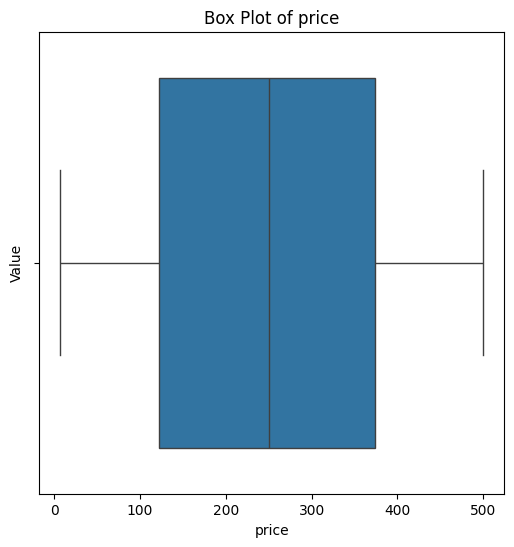

Plotting review_score...


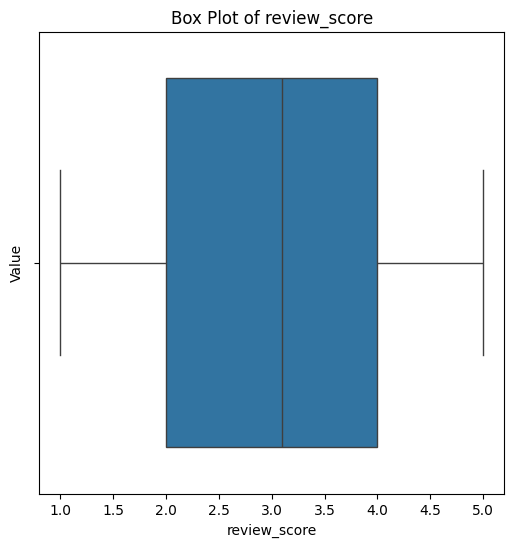

Plotting review_count...


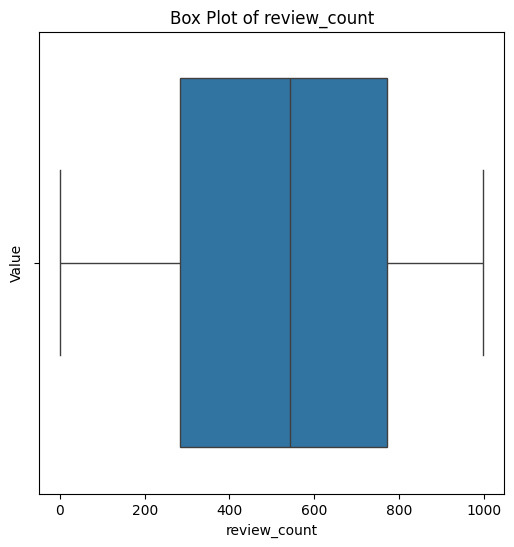

In [40]:
# Visual view to identify outliers
def plot_outliers(col):
  """
  This function makes a boxplot of
  the numerical cols, to identify outliers
  """

  plt.figure(figsize=(6, 6))
  sns.boxplot(x = df[col])
  plt.title(f"Box Plot of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Value")
  plt.show()

colum = df[["price", "review_score","review_count"]]

for col in colum:
  print(f"Plotting {col}...")
  plot_outliers(col);

Upon examining the box plot, all data points fall within the whiskers, indicating that there are no extreme values or potential outliers present in the dataset. The data appears to be normally distributed and free of anomalous values (no unusually high or low values).

With the dataset already cleaned and prepared for analysis, we can proceed directly to the analysis phase, bypassing the need for data preprocessing and quality control.

#### Create New Feature


In [41]:
# Total Units sold
df["Total_Sales_Vol"] = df[["sales_month_1", "sales_month_2", "sales_month_3", "sales_month_4", "sales_month_5", "sales_month_6",
                                   "sales_month_7", "sales_month_8", "sales_month_9", "sales_month_10", "sales_month_11", "sales_month_12"]].sum(axis=1)

df.head()


,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total_Sales_Vol
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


### Exploratory Data Analysis (EDA)

EDA will be conducted to gain insights into the data's underlying structure and patterns. The EDA will encompass the following components:

-  Univariate analysis for individual variable insights, to understand their
   distribution, central tendency, and variability.
- Categorical analysis for categorical patterns
- Bivariate analysis for variable relationships
- Time series analysis for temporal trends
- Correlation analysis for variable associations, investigating the strength  
  and direction of relationships between continuous variables


In [42]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,1000.0,500.50000,288.819436,1.00,250.75,500.50,750.250,1000.00
price,1000.0,247.67713,144.607983,7.29,121.81,250.92,373.435,499.86
review_score,1000.0,3.02760,1.171243,1.00,2.00,3.10,4.000,5.00
review_count,1000.0,526.50600,282.269932,1.00,283.75,543.00,772.000,999.00
sales_month_1,1000.0,498.30600,289.941478,0.00,245.50,507.50,740.750,1000.00
sales_month_2,1000.0,507.66100,285.992689,2.00,262.50,508.00,756.250,1000.00
sales_month_3,1000.0,506.73900,294.010873,0.00,243.75,493.00,777.250,999.00
sales_month_4,1000.0,503.82300,286.645567,0.00,261.50,501.50,749.500,1000.00
sales_month_5,1000.0,487.19400,287.844324,0.00,221.00,497.00,727.000,1000.00
sales_month_6,1000.0,491.65300,289.234018,0.00,236.00,479.50,740.500,1000.00


### Univariate Analysis
Here we focus on key features that are likely to provide valuable insight to the dataset.
Features to analyze here includes:
* Price: this will help in understanding the distribution of product prices.
* review_score: Analyzing this can help assess overall customer satisfaction
* review_count: This can help indicate the level of customer engagement and product popularity
* Monthly Units Sold: To identify sales pattern across all products, by month

#### Price

In [43]:
df["price"].describe()

count    1000.000000
mean      247.677130
std       144.607983
min         7.290000
25%       121.810000
50%       250.920000
75%       373.435000
max       499.860000
Name: price, dtype: float64

The prices of items are spread out over a significant range, indicating variability in the prices.  
In summary, the prices in the dataset range from 7.29 in dollars (lowest price) to 499.86 (highest price), with an average price of 247.68. Half of the prices are below 250.92, and 75% are below 373.44.


Text(0.5, 1.05, 'Distribution of Product Prices')

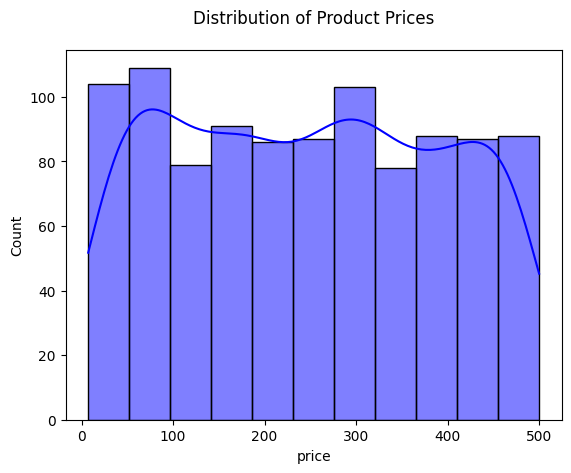

In [44]:
# sns.histplot(x=df["price"], data = df, color = "blue", kde = True)

sns.histplot(x=df["price"], data = df, color = "blue", kde = True)
plt.title("Distribution of Product Prices", y = 1.05)

The plots above reveal the underlying distribution of product prices and their frequency of occurrence with the KDE plot indicating non-uniformity due to multiple peaks, likely caused by the variety of products purchased.

#### Review Score
* We analyze this metric to understand customers feedback.

In [45]:
df["review_score"].describe()

count    1000.000000
mean        3.027600
std         1.171243
min         1.000000
25%         2.000000
50%         3.100000
75%         4.000000
max         5.000000
Name: review_score, dtype: float64

This data suggests that most reviewers gave scores around 3, with some variation. A few reviewers gave very low scores (1), while others gave perfect scores (5)

In [46]:
# Unique values
df["review_score"].unique()

array([1.7, 3.2, 4.5, 3.9, 4.2, 3.6, 3.8, 4.4, 2. , 3. , 1.9, 5. , 4.8,
       1.2, 4.7, 3.3, 1.1, 2.2, 4.9, 2.9, 2.3, 4.3, 3.4, 1.5, 1.3, 2.4,
       3.5, 3.1, 4.1, 2.6, 2.7, 4. , 1.4, 2.1, 2.5, 3.7, 1.6, 4.6, 1. ,
       2.8, 1.8])

In [68]:
# Group and count the review_score
score_group = df.groupby("review_score").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
score_group.head(10)

,review_score,counts
35,4.5,39
25,3.5,35
28,3.8,32
26,3.6,32
3,1.3,31
9,1.9,31
29,3.9,30
5,1.5,29
39,4.9,29
7,1.7,29


The review score distribution reveals that the majority of customers rated the product with 4.9 stars, while only a handful gave it the lowest rating of 1.0 star. To gain a more intuitive understanding of this distribution, we will create a visual representation, allowing us to better comprehend the concentration of ratings and identify patterns or trends.

Text(0.5, 1.05, 'Distribution of Top Review Scores')

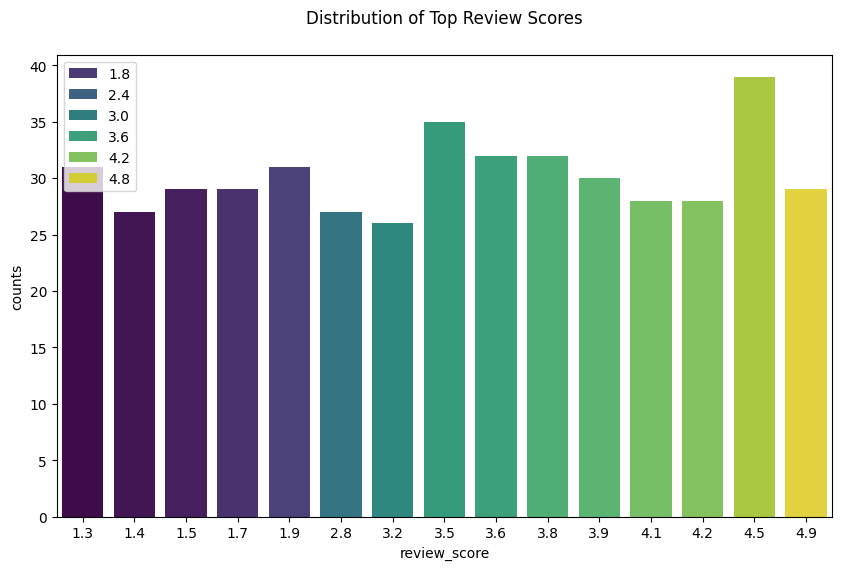

In [48]:
# Top 15 review rating
top_15_reviews = score_group.sort_values(by=["counts"], ascending = False).head(15)

# Plotting the review_score distribution
plt.figure(figsize=(10, 6))
sns.barplot(x="review_score",y = "counts", data=top_15_reviews, hue = "review_score", palette = "viridis")
plt.legend(loc = "upper left")
plt.title("Distribution of Top Review Scores", y=1.05)

Text(0.5, 1.05, 'Distribution of Least Review Scores')

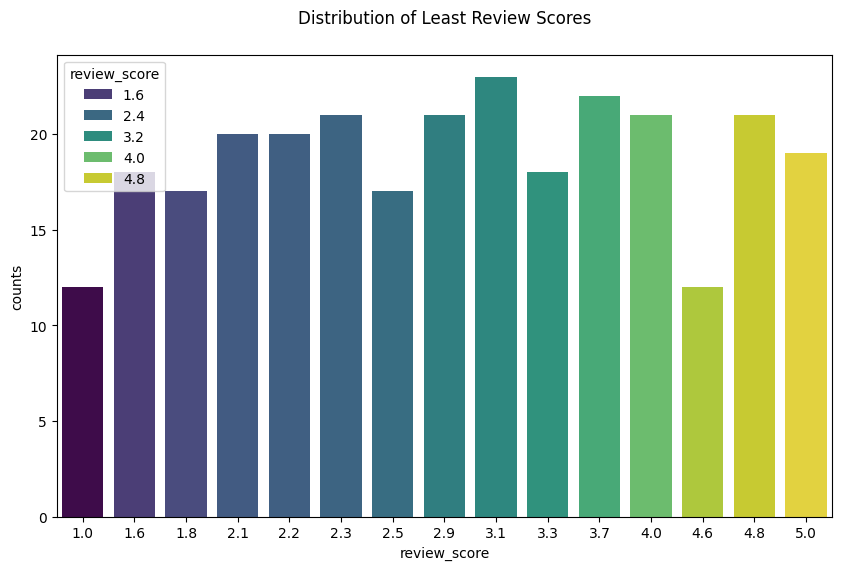

In [49]:
# Least 15 review rating
least_15_reviews = score_group.sort_values(by=["counts"], ascending = False).tail(15)

# Plotting the review_score distribution
plt.figure(figsize=(10, 6))
sns.barplot(x="review_score",y = "counts", data=least_15_reviews,hue = "review_score", palette = "viridis")
plt.title("Distribution of Least Review Scores", y=1.05)

#### Review count
- Review count measures customer engagement, indicating the level of interest
  and interaction with each product.

In [50]:
# Summary statistics of review_count
df["review_count"].describe()

count    1000.000000
mean      526.506000
std       282.269932
min         1.000000
25%       283.750000
50%       543.000000
75%       772.000000
max       999.000000
Name: review_count, dtype: float64

In summary, this data shows a wide range of customer review, from a minimum of 1 to a maximum of 999, with an average of 527 reviews. The median review count is 543, and the data is spread out, with a standard deviation of 282.

#### Total Sales Volume

Text(0.5, 0, 'Total Sales')

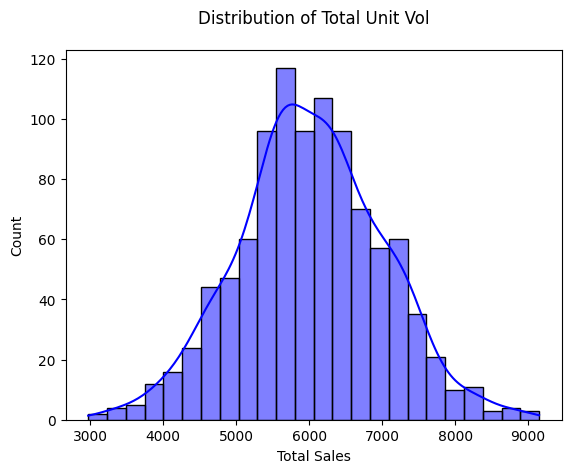

In [51]:
# Plotting the total sales volume distribution
sns.histplot(x=df["Total_Sales_Vol"], data = df, color = "blue", kde = True)
plt.title("Distribution of Total Unit Vol", y = 1.05)
plt.xlabel("Total Sales")


### Categorical Analysis
- Category: gives insight into the most purchased item

In [52]:
# Unique items
print(f"There are: {df['category'].nunique()} unique items within the dataset")

print(f"\nThese are:")
df["category"].unique()


There are: 7 unique items within the dataset

These are:


array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [53]:
# counts of items
df["category"].value_counts()

category
Books             154
Sports            153
Toys              151
Clothing          140
Health            139
Electronics       138
Home & Kitchen    125
Name: count, dtype: int64

This suggests that:

- Books and Sports are the most popular categories, with a similar number of products (154 and 153, respectively).
- Toys, Clothing, Health, and Electronics follow closely, with a relatively similar number of products (151-138).
- Home & Kitchen has the fewest products, with 125

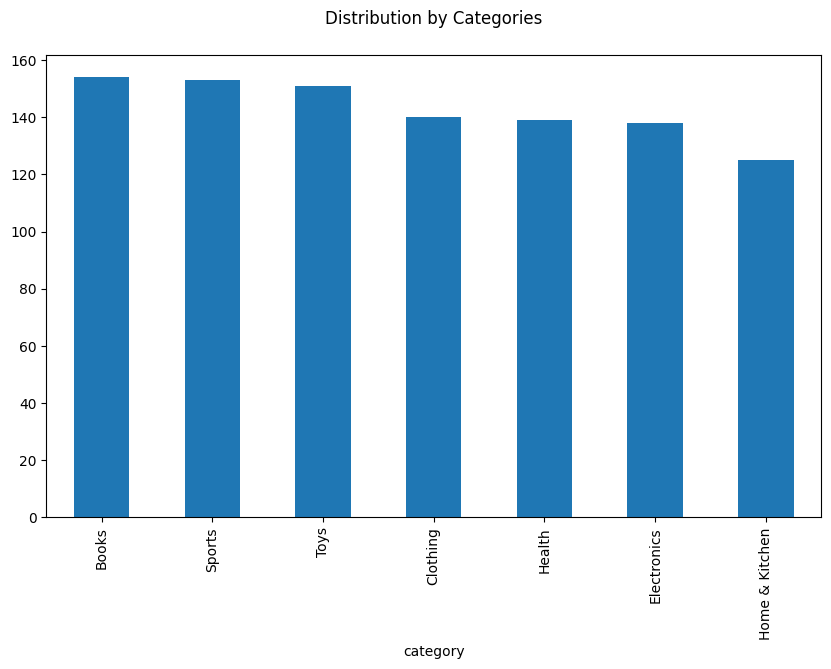

In [54]:
# Plotting the category distribution
plt.figure(figsize=(10, 6))
df["category"].value_counts().plot(kind="bar")
plt.title("Distribution by Categories", y =1.05)
plt.show()


### Bivariate Analysis
- Analyze relationships between pairs of features

1. Price vs Review score
2. Price vs Review Count
3. Price vs Total sales vol

Should there be any relationship between the pair, some potential insights from this analysis include:
- Is there a positive correlation between price and the features?
- Do higher-priced products tend to have higher review scores, more reviews or higher sales volume?
- Is there a threshold price beyond which review ratings, score or sales volume decreased?
- Are there any products with a disproportionately high number of reviews or high sales volume?






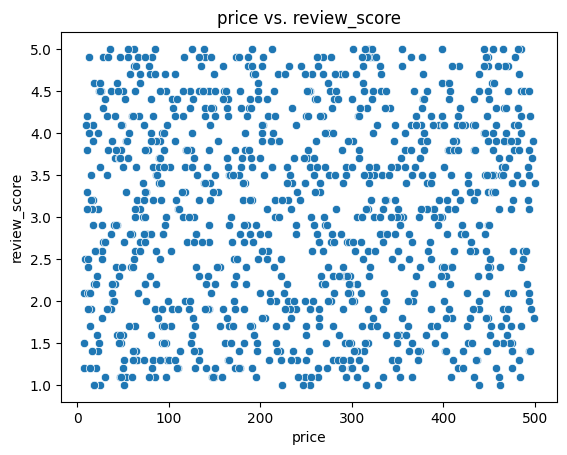

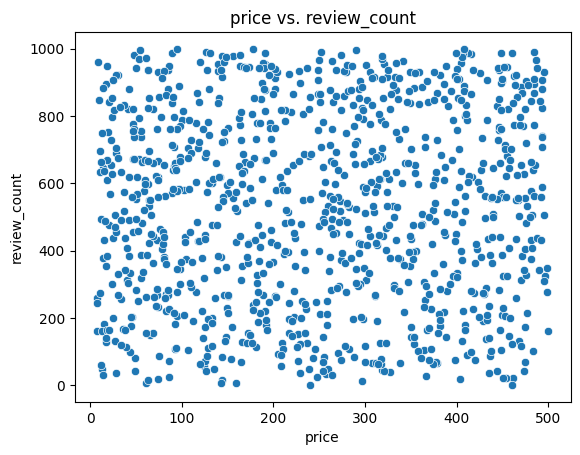

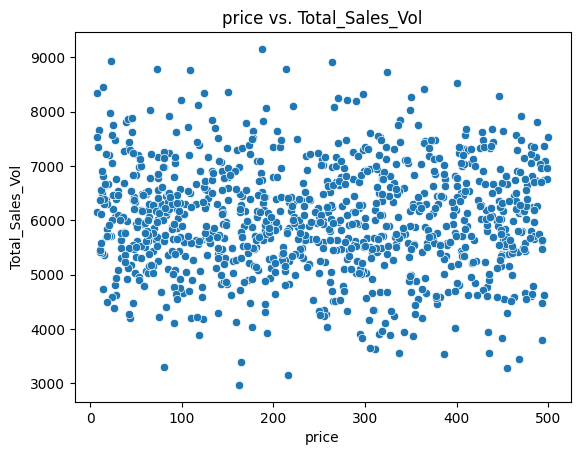

In [55]:
def scatter_plot(x, y):
    """
    Perform bivariate analysis between two variables
    """
    # Relationship plots
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Define the x variable
x = "price"

# Define the y variables
y_variables = ["review_score", "review_count", "Total_Sales_Vol"]

# Perform bivariate analysis for each y variable
for y in y_variables:
    scatter_plot(x, y)

There are no relationship between the variables

-  Price vs Review score: it may indicate that review scores are influenced by factors other than price, such as product quality or customer service.
- Price vs Review count: it may suggest that review counts are driven by factors like marketing efforts or product visibility, rather than price.
- Price vs Total Sales Vol: it may indicate that sales volume is influenced by factors like market demand or marketing strategies, rather than price.




### Trend Analysis
* Monthly Sales Trend

Anayzing the total number of units sold each month, aggregated across all products, to identify seasonal trends in sales.

In [56]:
# Sum of Units sold
monthly_sales = df[["sales_month_1", "sales_month_2", "sales_month_3", "sales_month_4", "sales_month_5", "sales_month_6",
                                   "sales_month_7", "sales_month_8", "sales_month_9", "sales_month_10", "sales_month_11", "sales_month_12"]].sum(axis=0)
monthly_sales

sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64

Text(0, 0.5, 'Total Sales')

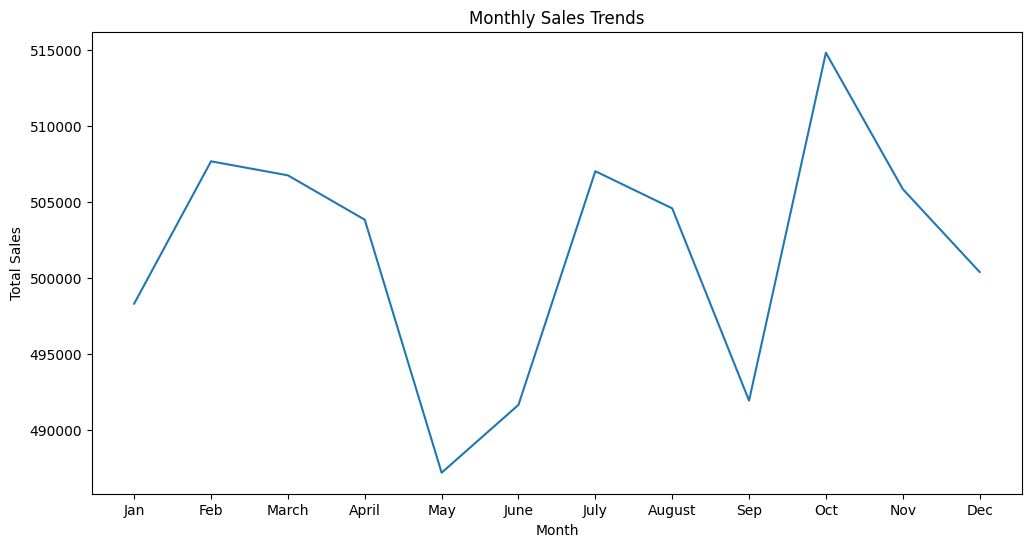

In [57]:
# Monthly sales df
monthly_sales_df = pd.DataFrame(monthly_sales, columns=["sales"])
monthly_sales_df.index = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]

# Line Plot for Monthly Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_df, x=monthly_sales_df.index, y="sales")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")


- The most significant decline in sales occurred in May, with September experiencing the second-largest drop.
- Conversely, the highest sales were recorded in November, followed closely by February and then July, which were the next most successful months.


### Correlation Analysis

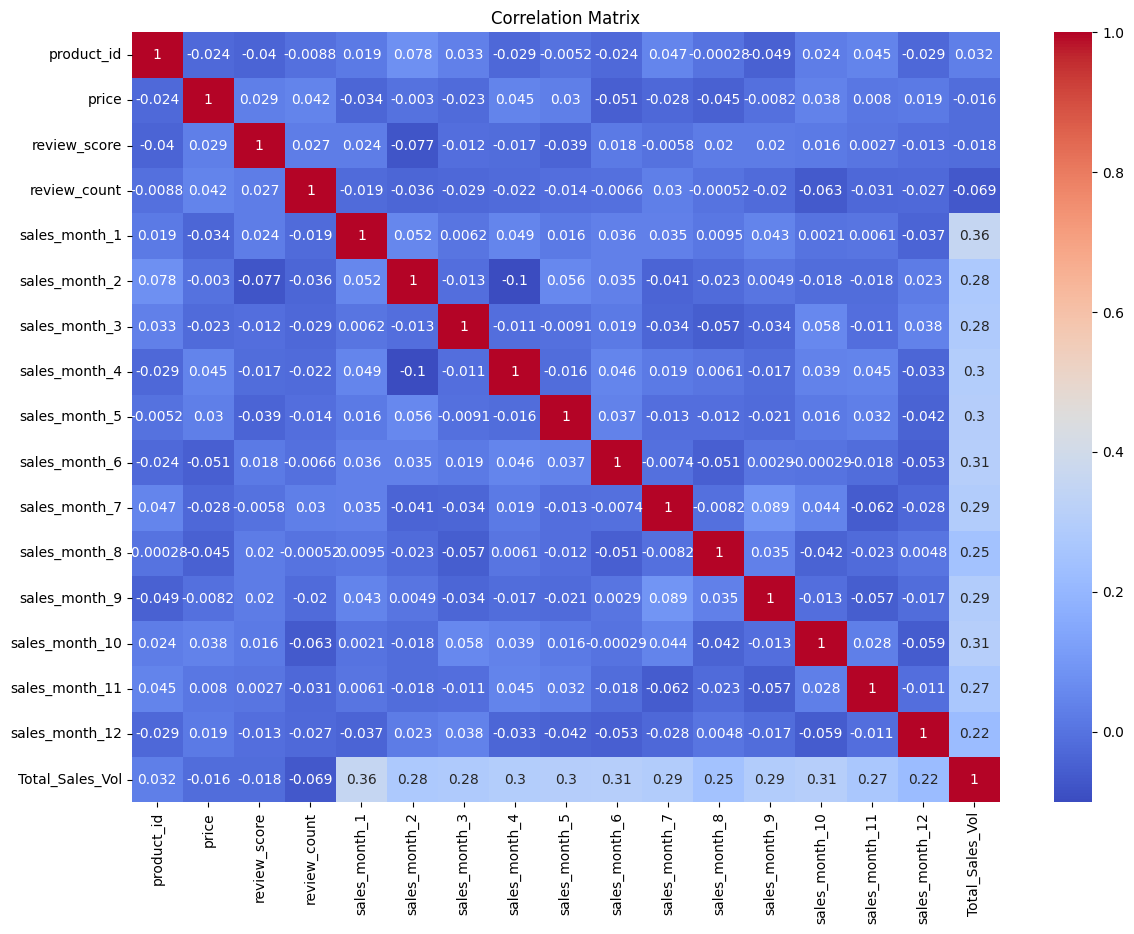

In [58]:
# Only numerical features
numerical_df = df.select_dtypes(exclude="object")

# Correlation
correlation_matrix = numerical_df.corr()

#Ploting correlation matrix of numerical features
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Analyzing Product Rating
* High rated products: Those with a review rating of 4 or higher (>=4)
* Low rated products: Those with a review rating below 2 (<=2)



In [59]:
# Assuming review_score is a rating out of 5

# High rating products (rating >= 4)
high_rated_products = df[df["review_score"] >= 4]

num_products = len(high_rated_products)
print(f"There are: {num_products} highly rated products")

print("\nProducts with High Rating (>= 4):")
print(high_rated_products[["product_name", "review_score"]])


There are: 266 highly rated products

Products with High Rating (>= 4):
    product_name  review_score
2      Product_3           4.5
4      Product_5           4.2
7      Product_8           4.4
11    Product_12           5.0
12    Product_13           4.8
..           ...           ...
979  Product_980           4.4
981  Product_982           4.2
990  Product_991           4.1
994  Product_995           4.0
996  Product_997           4.8

[266 rows x 2 columns]


In [60]:
# Low rating products (rating <= 2)
low_rated_products = df[df['review_score'] <= 2]

len_products = len(low_rated_products)
print(f"There are: {len_products} low rated products")

# Display results
print("\nProducts with Low Rating (<= 2):")
print(low_rated_products[["product_name", "review_score"]])

There are: 268 low rated products

Products with Low Rating (<= 2):
    product_name  review_score
0      Product_1           1.7
8      Product_9           2.0
10    Product_11           1.9
13    Product_14           1.2
16    Product_17           1.7
..           ...           ...
985  Product_986           1.3
991  Product_992           1.6
993  Product_994           1.5
997  Product_998           1.3
998  Product_999           1.2

[268 rows x 2 columns]


### Highest Product Sold on a Monthly Basis

In [70]:
# Find highest product sold for each month
monthly_top_products = df.set_index("product_name")[["sales_month_" + str(i) for i in range(1, 13)]].idxmax()

# Display results
print("Highest Product Sold on a Monthly Basis:\n")
print(monthly_top_products)


Highest Product Sold on a Monthly Basis:

sales_month_1     Product_272
sales_month_2     Product_853
sales_month_3     Product_866
sales_month_4     Product_391
sales_month_5     Product_202
sales_month_6     Product_803
sales_month_7     Product_263
sales_month_8     Product_912
sales_month_9      Product_77
sales_month_10    Product_435
sales_month_11    Product_346
sales_month_12    Product_727
dtype: object


#### Highest Category Sold on a Monthly Basis

* Monthly Basis

In [62]:
# Total sales by category for each month
monthly_category_sales = df.groupby("category")[["sales_month_" + str(i) for i in range(1, 13)]].sum().reset_index()

print("Sum of monthly sales by category")
monthly_category_sales

Sum of monthly sales by category


,category,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
1,Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
2,Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
3,Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
4,Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
5,Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
6,Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [63]:
# Highest category sold for each month
monthly_top_categories = monthly_category_sales.set_index("category").idxmax()

# Print results
print("Highest Category Sold on a Monthly Basis:")
print(monthly_top_categories)

Highest Category Sold on a Monthly Basis:
sales_month_1       Toys
sales_month_2     Sports
sales_month_3      Books
sales_month_4      Books
sales_month_5      Books
sales_month_6       Toys
sales_month_7      Books
sales_month_8       Toys
sales_month_9     Sports
sales_month_10     Books
sales_month_11     Books
sales_month_12      Toys
dtype: object


Text(95.58159722222221, 0.5, 'Month')

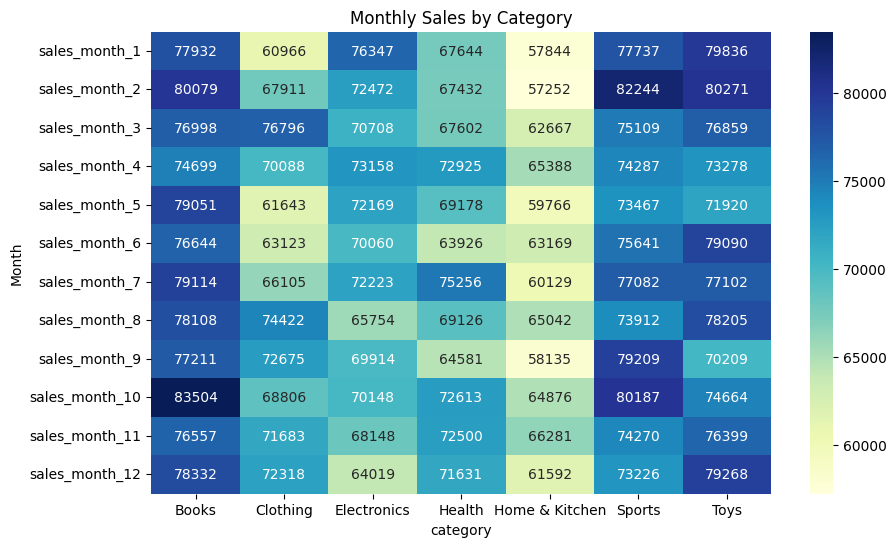

In [64]:
# Transpose the DataFrame to fit the heatmap format
heatmap_data = monthly_category_sales.set_index("category").T

# Create a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Monthly Sales by Category")
plt.ylabel("Month")


### Top 5 Products with the Most Engagement

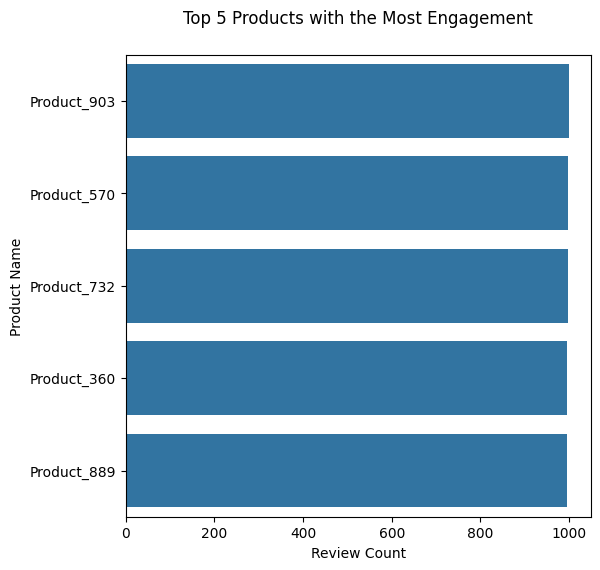

In [72]:
# Find top 10 products with the most engagement
top_engagement_products = df.nlargest(5, "review_count")

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x="review_count", y="product_name", data=top_engagement_products)
plt.title("Top 5 Products with the Most Engagement", y=1.05)
plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.show()


###  Category with the Most Engagement

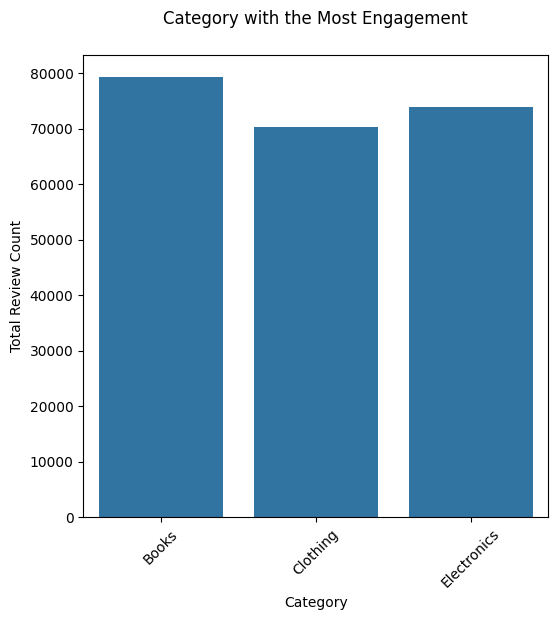

In [74]:
# Sum review counts by category
category_engagement = df.groupby("category")["review_count"].sum().reset_index()
top_3 = category_engagement.head(3)

# Plotting distribution of category with most engagement
plt.figure(figsize=(6, 6))
sns.barplot(x="category", y="review_count", data=top_3 )
plt.title("Category with the Most Engagement", y=1.05)
plt.xlabel("Category")
plt.ylabel("Total Review Count")
plt.xticks(rotation=45)
plt.show()


###  Category with the least Engagement

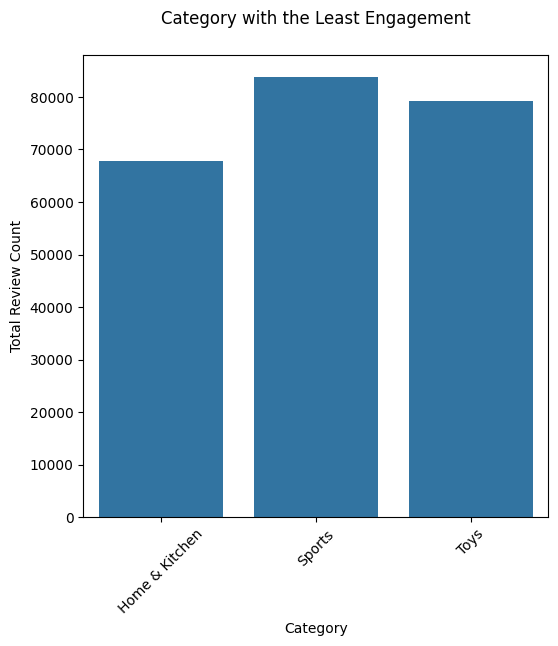

In [76]:
# Sum review counts by category
category_engagement = df.groupby("category")["review_count"].sum().reset_index()
least_3 = category_engagement.tail(3)

# Plotting distribution of category with least engagement
plt.figure(figsize=(6, 6))
sns.barplot(x="category", y="review_count", data=least_3 )
plt.title("Category with the Least Engagement", y=1.05)
plt.xlabel("Category")
plt.ylabel("Total Review Count")
plt.xticks(rotation=45)
plt.show()